## DATA1030 Final Project

My object through this project is to develop a classifier to predict whether a customer will churn for a subscription-based service based on their usage data. Customer churn, the rate at which customers cancel their subscriptions, is a vital metric for businesses offering subscription services. Predictive analytics techniques are employed to anticipate which customers are likely to churn, enabling companies to take proactive measures for customer retention.

### EDA

In [24]:
import pandas as pd
df = pd.read_csv('data/churn.csv')
df.head()
df.describe

<bound method NDFrame.describe of         AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0               20       11.055215    221.104302          Premium   
1               57        5.175208    294.986882            Basic   
2               73       12.106657    883.785952            Basic   
3               32        7.263743    232.439774            Basic   
4               57       16.953078    966.325422          Premium   
...            ...             ...           ...              ...   
243782          77        9.639902    742.272460            Basic   
243783         117       13.049257   1526.763053          Premium   
243784         113       14.514569   1640.146267          Premium   
243785           7       18.140555    126.983887          Premium   
243786          90       11.593774   1043.439704          Premium   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0           Mailed check               No        Both         

In [25]:
df_des= pd.read_csv('data/data_descriptions.csv')

df_des

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


This is a data set containing 243781 observation and 20 features in addition to the target variable "Churn".


In [26]:
# there is no missing value

print(df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


This plot shows the churn rate across different subscription types and payment methods. 

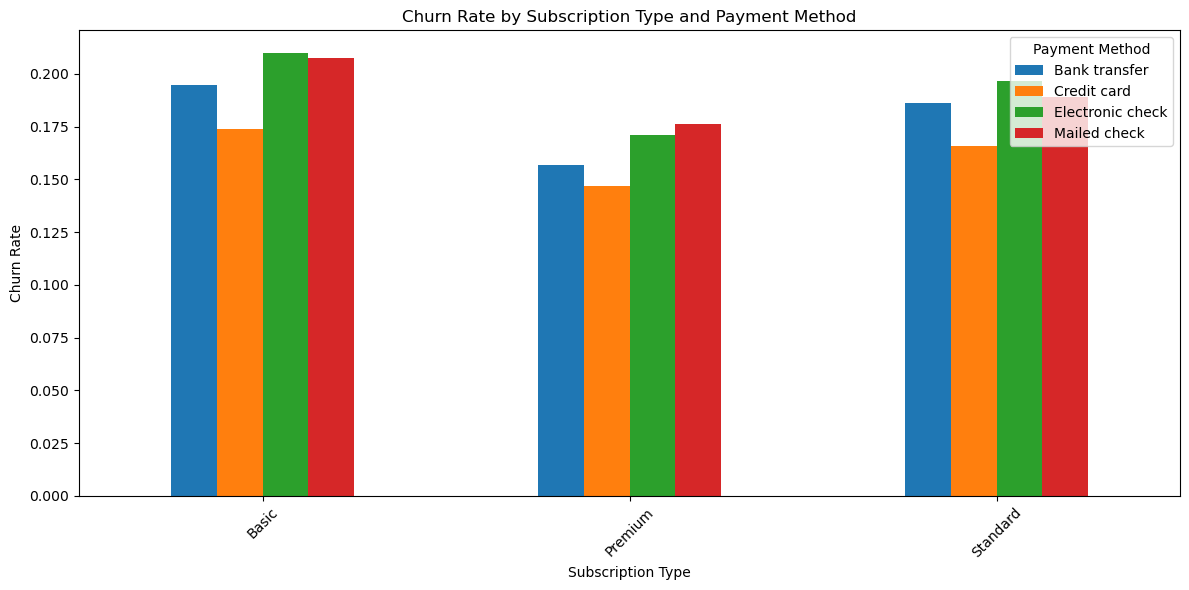

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate churn rate
churn_rate = df.groupby(['SubscriptionType', 'PaymentMethod'])['Churn'].mean().unstack()

# Create the plot
churn_rate.plot(kind='bar', figsize=(12, 6))
plt.title('Churn Rate by Subscription Type and Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

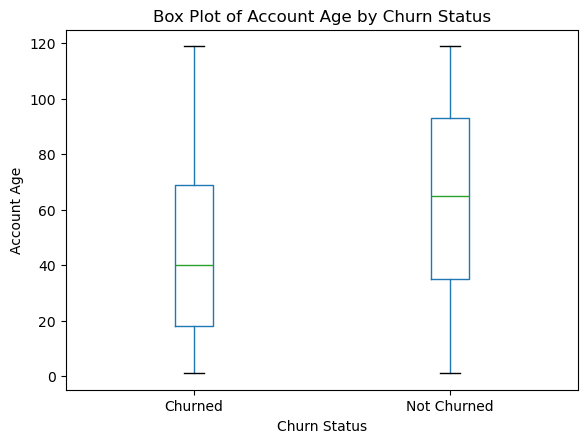

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/churn.csv') 

df['Churn'] = df['Churn'].replace({0: 'Not Churned', 1: 'Churned'})  # Map 0 and 1 to labels

# Plot the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='AccountAge', by='Churn', grid=False, showfliers=True)
plt.title('Box Plot of Account Age by Churn Status')
plt.suptitle('')  # Remove automatic title from the subplot
plt.xlabel('Churn Status')
plt.ylabel('Account Age')
plt.show()


This plot visualizes the relationship between monthly charges and churn with a fitted logistic regression line.

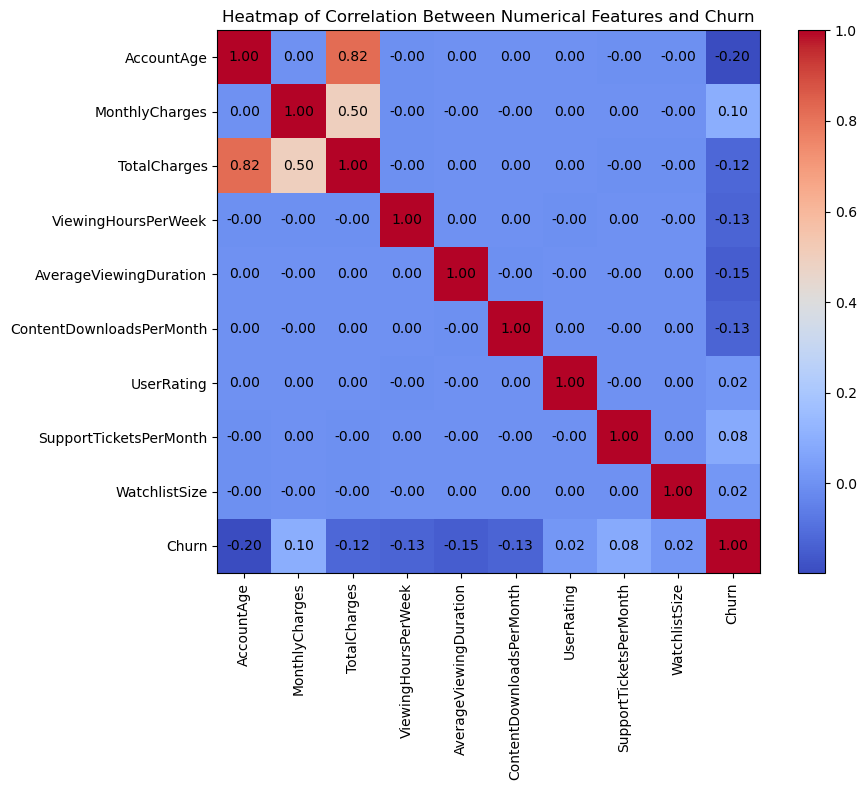

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


numerical_features = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_features.corr()


plt.figure(figsize=(10, 8))
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')


plt.colorbar(cax)


plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)


plt.title('Heatmap of Correlation Between Numerical Features and Churn')

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()



In [29]:

y = df["Churn"]
X= df.loc[:, df.columns != 'Churn']
print(y.value_counts())

Churn
0    199605
1     44182
Name: count, dtype: int64


Around 22% of the observations has the Churn value of 1, which means only 22% of the users would cancel their subscriptions. This is an imbalanced data, thus I would use StratifiedKFold strategy to split the data set.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([0, 1], dtype=int64), array([119763,  26509], dtype=int64))
(array([0, 1], dtype=int64), array([39921,  8836], dtype=int64))
(array([0, 1], dtype=int64), array([39921,  8837], dtype=int64))


### Pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 

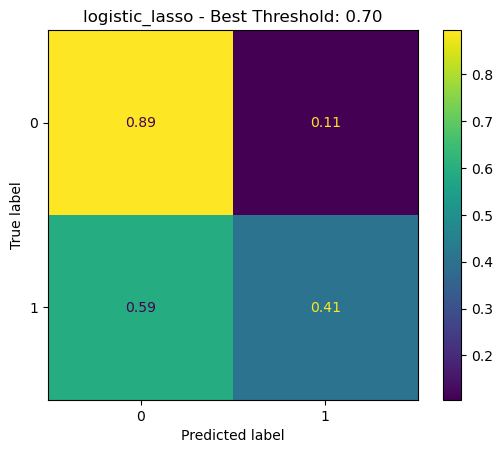

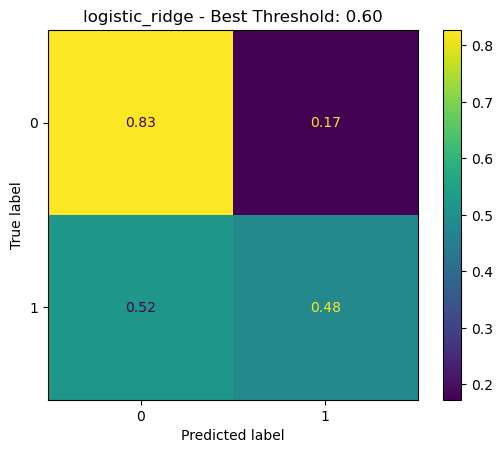

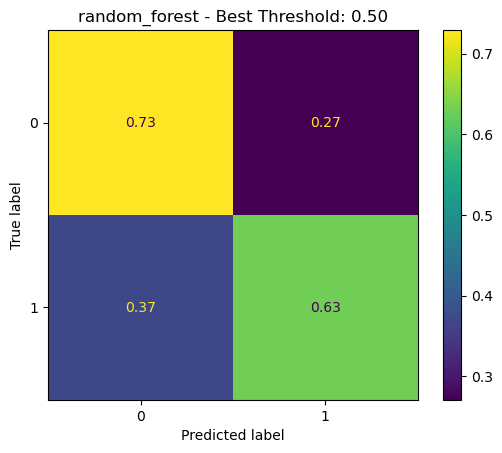

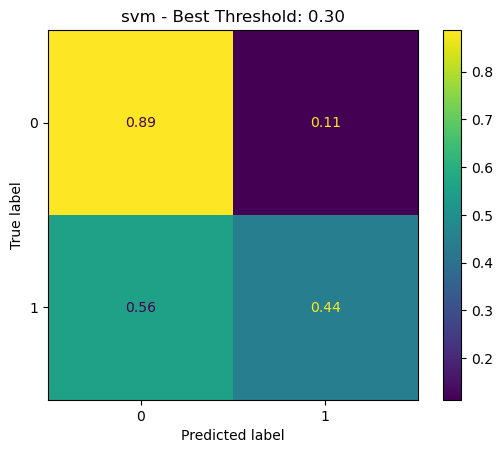

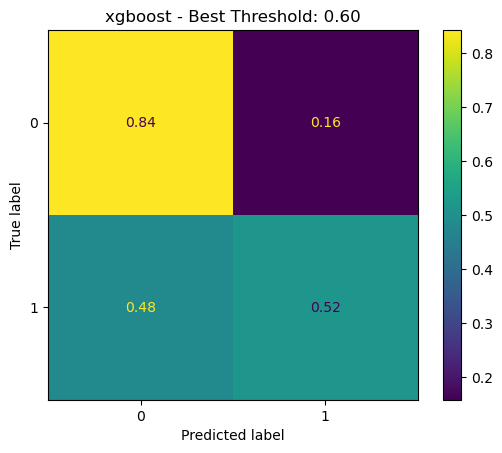

            Model  Average_Score  Avg_Std_Dev  \
0  logistic_lasso       0.414728     0.044540   
1  logistic_ridge       0.426121     0.048608   
2   random_forest       0.397811     0.079546   
3             svm       0.429517     0.045702   
4         xgboost       0.421127     0.067305   

                                                                       Best_Params  
0                                        {'model__C': 0.1, 'model__penalty': 'l1'}  
1                                       {'model__C': 0.01, 'model__penalty': 'l2'}  
2                              {'model__max_depth': 1, 'model__max_features': 0.7}  
3               {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}  
4  {'model__learning_rate': 0.2, 'model__max_depth': 1, 'model__n_estimators': 25}  


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_classification_models_with_split(X, y, preprocessor, models, param_grids, test_size=0.2, scoring='f1', n_splits=5, n_random_states=5):
    """
    Evaluate multiple classification models using Stratified K-Fold Cross-Validation and determine the best threshold.

    Parameters:
        X (pd.DataFrame): Feature dataset.
        y (pd.Series): Target variable.
        preprocessor (ColumnTransformer): Predefined preprocessing pipeline.
        models (dict): Dictionary with model names as keys and model instances as values.
        param_grids (dict): Dictionary with model names as keys and their respective hyperparameter grids as values.
        test_size (float): Proportion of the dataset to include in the test split. Default is 0.2.
        scoring (str): Scoring metric to optimize in GridSearchCV. Default is 'f1'.
        n_splits (int): Number of folds for Stratified K-Fold Cross-Validation. Default is 5.
        n_random_states (int): Number of different random states to use in the evaluation for averaging. Default is 5.

    Returns:
        pd.DataFrame: Results summary with average scores, standard deviation, and best parameters for each model.
        dict: Dictionary containing the best threshold for each model and its confusion matrix.
    """
    results = []
    best_model_pipelines = {}
    model_thresholds = {}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    for model_name, model_instance in models.items():
        param_grid = param_grids[model_name]

        # Lists to store results for each random state
        model_scores = []
        model_std_devs = []
        thresholds = np.arange(0.1, 1.0, 0.1)

        best_threshold = 0.5
        best_f1 = -np.inf
        final_cm = None

        for random_state in range(n_random_states):
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', clone(model_instance))
            ])

            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                scoring=scoring,
                cv=skf,
                n_jobs=-1,
                verbose=1
            )

            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            y_probs = grid_search.predict_proba(X_test)[:, 1]

            for threshold in thresholds:
                y_pred = (y_probs >= threshold).astype(int)
                f1 = f1_score(y_test, y_pred)
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold
                    final_cm = confusion_matrix(y_test, y_pred)

            # Calculate cross-validation scores
            cv_scores = []
            for train_idx, val_idx in skf.split(X_train, y_train):
                X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                best_model.fit(X_train_cv, y_train_cv)
                y_val_pred = best_model.predict(X_val)
                cv_scores.append(f1_score(y_val, y_val_pred))

            model_scores.append(np.mean(cv_scores))
            model_std_devs.append(np.std(cv_scores))

        # After looping through all random states, calculate the average and std deviation of the scores
        avg_score = np.mean(model_scores)
        avg_std_dev = np.mean(model_std_devs)

        # Store results for this model
        results.append({
            'Model': model_name,
            'Average_Score': avg_score,
            'Avg_Std_Dev': avg_std_dev,
            'Best_Params': grid_search.best_params_
        })

        # Save the best threshold and confusion matrix
        model_thresholds[model_name] = {
            'best_threshold': best_threshold,
            'confusion_matrix': final_cm
        }

        best_model_pipelines[model_name] = grid_search.best_estimator_

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot confusion matrices
    for model_name, metrics in model_thresholds.items():
        cm = metrics['confusion_matrix']

        # Row-wise normalization
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Plot the normalized confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1])
        disp.plot(cmap='viridis', values_format=".2f")
        plt.title(f"{model_name} - Best Threshold: {metrics['best_threshold']:.2f}")
        plt.show()

    return results_df, best_model_pipelines, model_thresholds

# Example usage
df = pd.read_csv('data/churn.csv')
y = df["Churn"]
X = df.loc[:, df.columns != 'Churn']

# Define preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                      'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                      'SupportTicketsPerMonth', 'WatchlistSize']
ordinal_features = ['SubscriptionType']
categorical_features = ['PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
                        'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl',
                        'SubtitlesEnabled', 'CustomerID']
subscription_order = [['Basic', 'Standard', 'Premium']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=subscription_order), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'logistic_lasso': LogisticRegression(max_iter=4000, class_weight='balanced', penalty='l1', solver='liblinear'),
    'logistic_ridge': LogisticRegression(max_iter=4000, class_weight='balanced', penalty='l2', solver='lbfgs'),
    'random_forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
    'svm': SVC(probability=True, class_weight='balanced', kernel='linear'),
    'xgboost': XGBClassifier(eval_metric='logloss', scale_pos_weight=y.value_counts()[0] / y.value_counts()[1])
}

# Define hyperparameter grids
param_grids = {
    'logistic_lasso': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1']
    },
    'logistic_ridge': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l2']
    },
    'random_forest': {
        'model__max_depth': [1, 5, 10, 20, 30],
        'model__max_features': [0.1, 0.5, 0.7, 0.9]
    },
    'svm': {
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto', 0.1, 1]
    },
    'xgboost': {
        'model__n_estimators': [10, 25, 50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [1, 3, 5, 7, 10]
    }
}

# Run evaluation
results_df, best_model_pipelines, model_thresholds = evaluate_classification_models_with_split(
    X=X,
    y=y,
    preprocessor=preprocessor,
    models=models,
    param_grids=param_grids,
    test_size=0.2,
    scoring='f1',
    n_splits=5,
    n_random_states=5
)

print(results_df)


### Results

In [ ]:

import pandas as pd

pd.set_option('display.max_colwidth', None)

print(results_df)

            Model  Average_Score  Avg_Std_Dev  \
0  logistic_lasso       0.414728     0.044540   
1  logistic_ridge       0.426121     0.048608   
2   random_forest       0.397811     0.079546   
3             svm       0.429517     0.045702   
4         xgboost       0.421127     0.067305   

                                                                       Best_Params  
0                                        {'model__C': 0.1, 'model__penalty': 'l1'}  
1                                       {'model__C': 0.01, 'model__penalty': 'l2'}  
2                              {'model__max_depth': 1, 'model__max_features': 0.7}  
3               {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}  
4  {'model__learning_rate': 0.2, 'model__max_depth': 1, 'model__n_estimators': 25}  


Baseline proportion of Class 1: 0.184


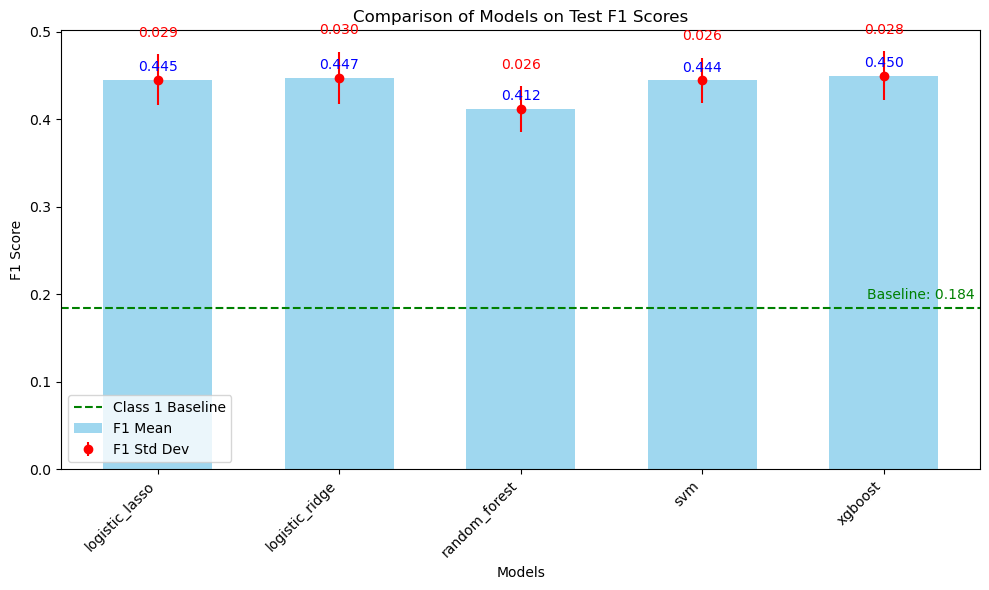

            Model  Average_Score  Avg_Std_Dev  \
0  logistic_lasso       0.445165     0.028935   
1  logistic_ridge       0.447221     0.029625   
2   random_forest       0.411727     0.026032   
3             svm       0.444324     0.025868   
4         xgboost       0.449557     0.028069   

                                                                                                                                Best_Params  
0                                                                                                 {'model__C': 0.1, 'model__penalty': 'l1'}  
1                                                                                                {'model__C': 0.01, 'model__penalty': 'l2'}  
2                                                                                       {'model__max_depth': 5, 'model__max_features': 0.7}  
3                                                                          {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf

In [ ]:
# Calculate the proportion of Class 1 in the dataset
class_1_baseline = y.value_counts(normalize=True)[1]
print("Baseline proportion of Class 1:", class_1_baseline)

# Plot histogram for model comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.6

# Bar plot for F1 mean scores
plt.bar(x, results_df['Average_Score'], width, label='F1 Mean', color='skyblue', alpha=0.8)

plt.errorbar(x, results_df['Average_Score'], yerr=results_df['Avg_Std_Dev'], fmt='o', color='red', label='F1 Std Dev')

for i, (mean, std_dev) in enumerate(zip(results_df['Average_Score'], results_df['Avg_Std_Dev'])):
    plt.text(i, mean + 0.01, f"{mean:.3f}", ha='center', color='blue')  # Mean score to 3 decimal places
    plt.text(i, mean + std_dev + 0.02, f"{std_dev:.3f}", ha='center', color='red')  # Std dev to 3 decimal places

plt.axhline(y=class_1_baseline, color='green', linestyle='--', label='Class 1 Baseline')

plt.text(len(results_df) - 0.5, class_1_baseline + 0.01, f"Baseline: {class_1_baseline:.3f}",
         color='green', fontsize=10, ha='right')

plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Models on Test F1 Scores')
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)


**feature importance**

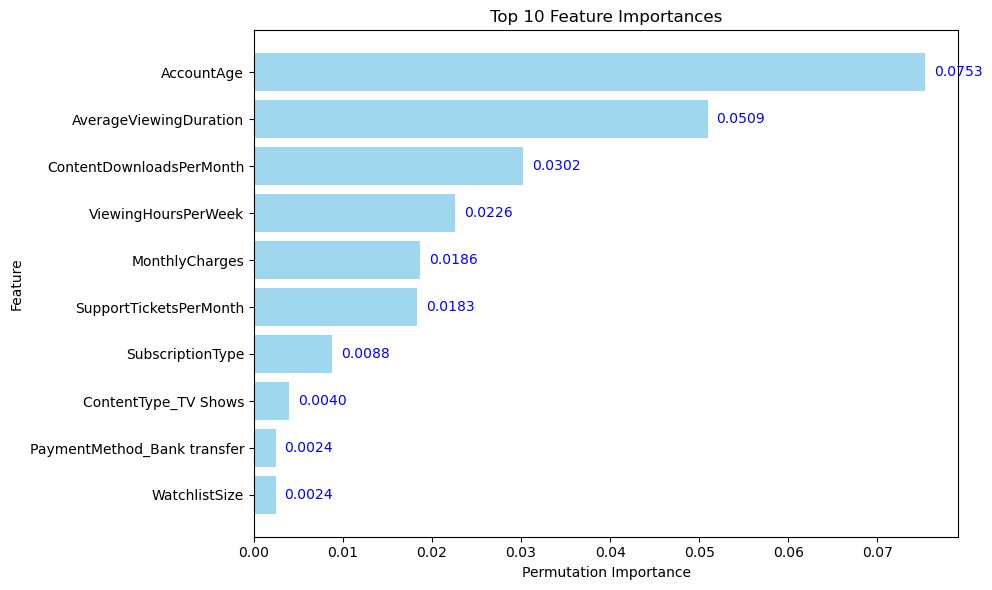

In [ ]:
# Feature importance for XGBoost
from scipy.sparse import issparse
from sklearn.inspection import permutation_importance

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocessor.fit(X_train_val)
X_train_val_transformed = preprocessor.transform(X_train_val)
X_test_transformed = preprocessor.transform(X_test)

if issparse(X_train_val_transformed):
    X_train_val_transformed = X_train_val_transformed.toarray()

if issparse(X_test_transformed):
    X_test_transformed = X_test_transformed.toarray()

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_val_transformed, y_train_val)

perm_importance = permutation_importance(
    xgb_model,
    X_test_transformed,
    y_test,
    scoring='neg_log_loss',
    n_repeats=30,
    random_state=42,
)

sorted_idx = perm_importance.importances_mean.argsort()[-10:][::-1]
feature_names = numerical_features + ordinal_features + list(preprocessor.transformers_[2][1].get_feature_names_out())
top_features = np.array(feature_names)[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_features, perm_importance.importances_mean[sorted_idx], color='skyblue', alpha=0.8)
for i, v in enumerate(perm_importance.importances_mean[sorted_idx]):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center', color='blue')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


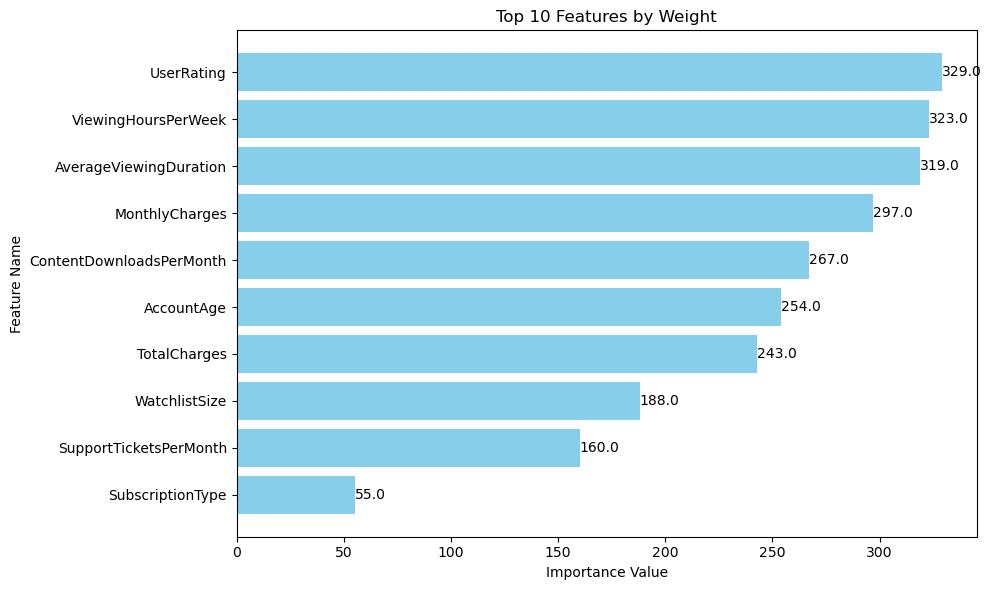

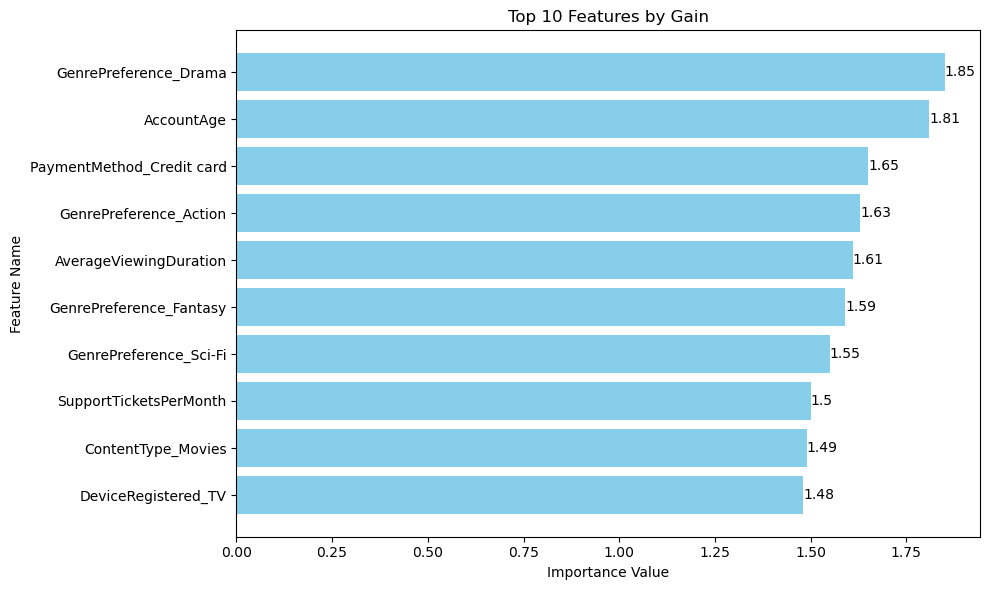

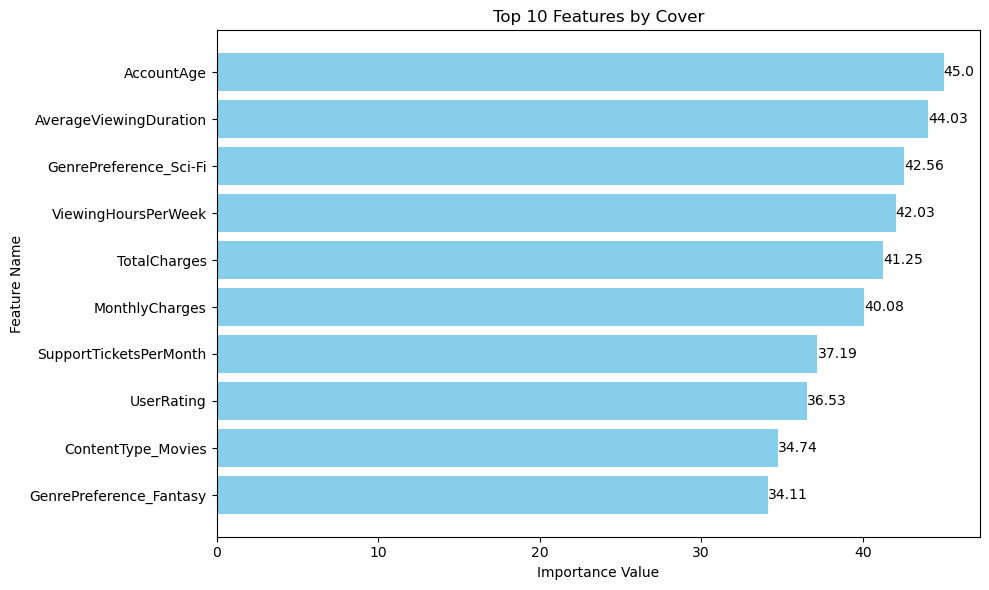

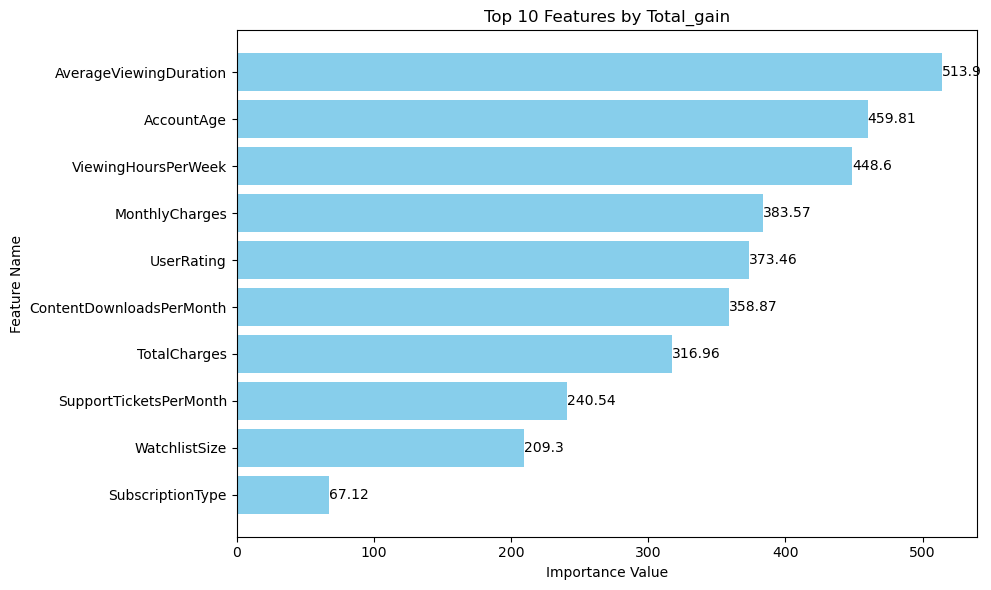

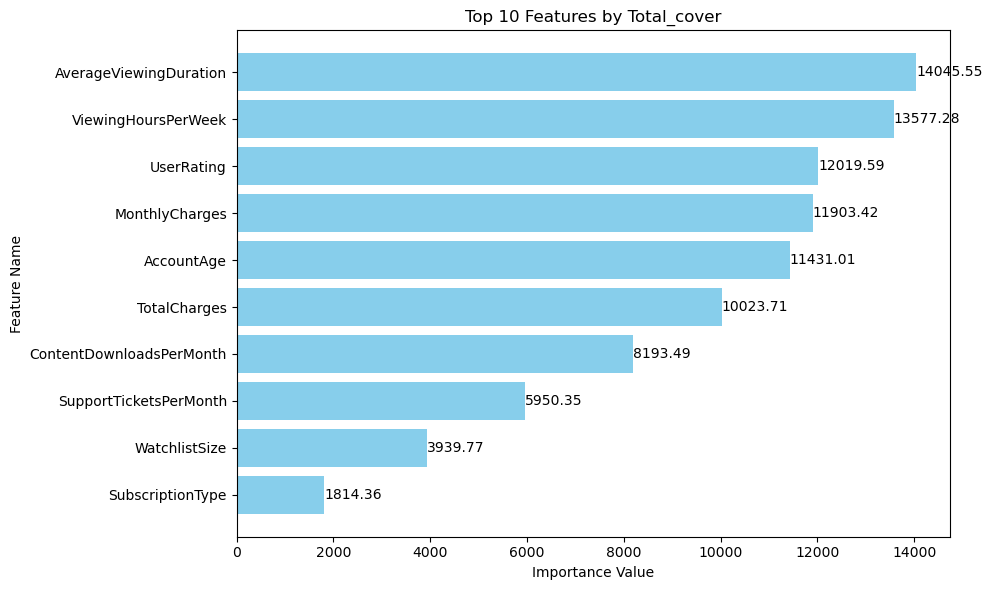

In [ ]:
from xgboost import Booster
import matplotlib.pyplot as plt

importance_metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

best_model_pipeline = best_model_pipelines['xgboost']
feature_names = numerical_features + ordinal_features + list(
    best_model_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()
)

for metric in importance_metrics:
    importance = xgb_model.get_booster().get_score(importance_type=metric)
    
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    
    top_features = [feature_names[int(k[1:])] for k, v in sorted_importance[:10]]  # Map feature indices to names
    top_importance = [round(v, 2) for k, v in sorted_importance[:10]]  # Round values to 2 decimals
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_importance[::-1], color='skyblue')  # Reverse for descending order
    plt.xlabel('Importance Value')
    plt.ylabel('Feature Name')
    plt.title(f'Top 10 Features by {metric.capitalize()}')
    for i, value in enumerate(top_importance[::-1]):
        plt.text(value, i, str(value), va='center', ha='left', fontsize=10)
    plt.tight_layout()
    plt.show()



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 

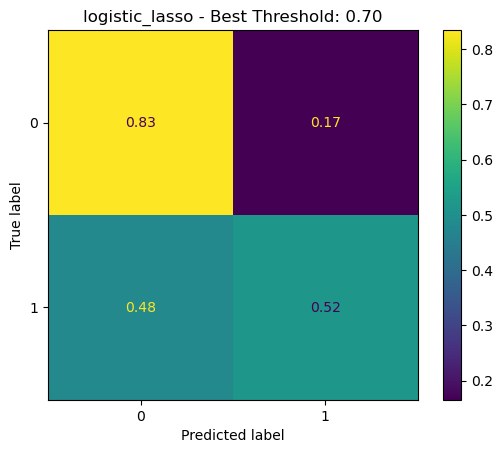

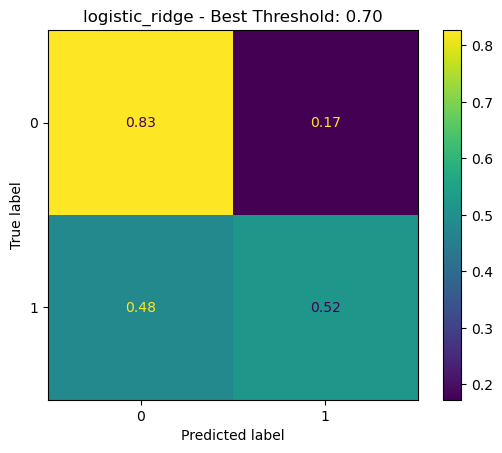

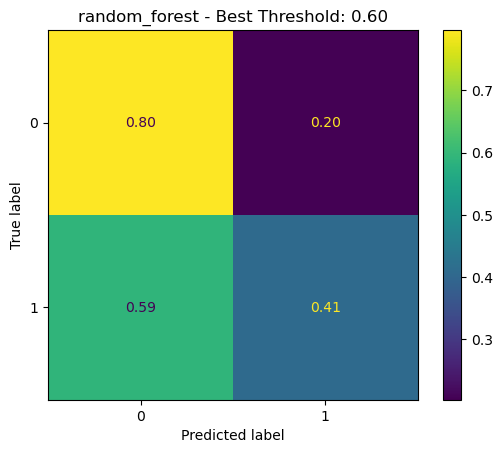

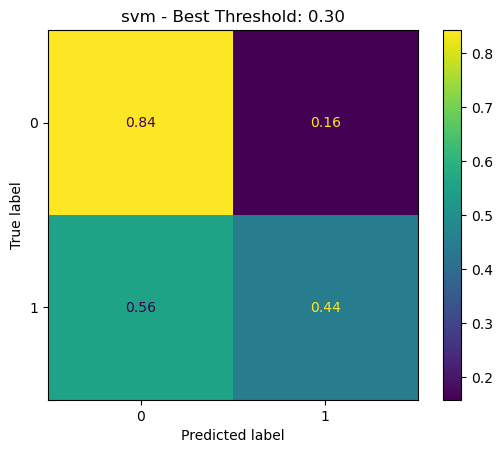

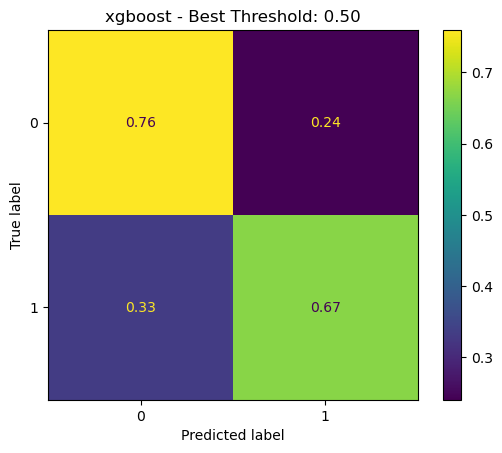

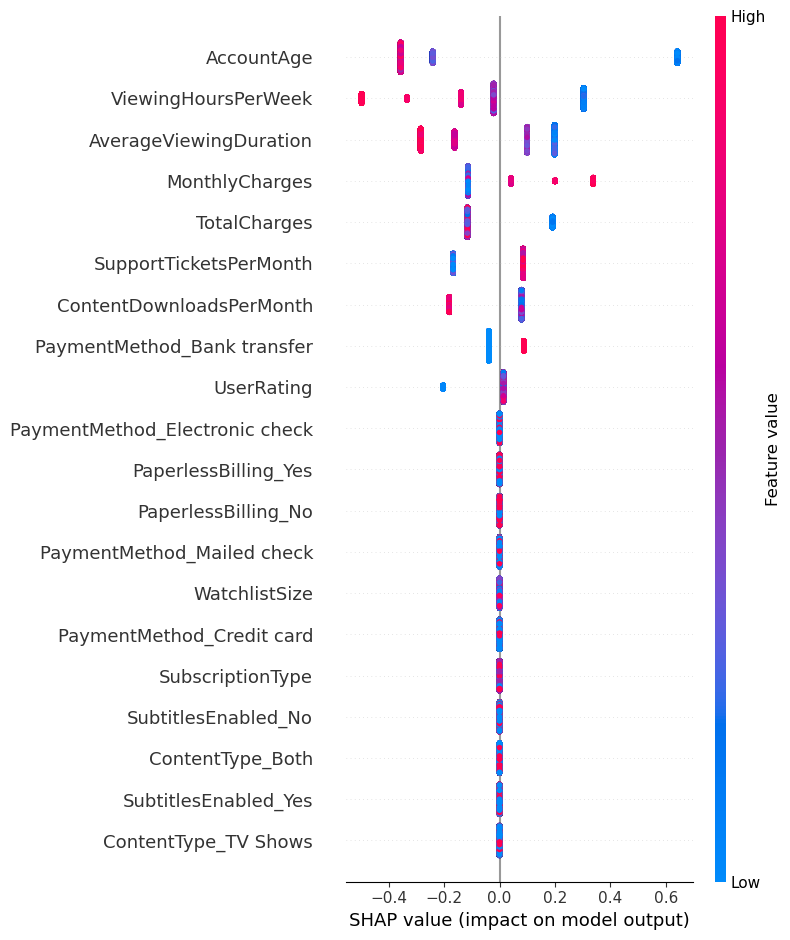

In [ ]:
# Exclude 'CustomerID' from the features
df = pd.read_csv('data/churn.csv')
df_sampled = df.sample(n=800, random_state=42)
y = df_sampled["Churn"]
X = df_sampled.loc[:, df.columns != 'Churn']
categorical_features = [
    'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
    'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl',
    'SubtitlesEnabled'
]  
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=subscription_order), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

results_df, best_model_pipelines, model_thresholds = evaluate_classification_models_with_split(
    X=X,
    y=y,
    preprocessor=preprocessor,
    models=models,
    param_grids=param_grids,
    test_size=0.2,
    scoring='f1',
    n_splits=5,
    n_random_states=5
)
model_name = 'xgboost'
best_model_pipeline = best_model_pipelines[model_name]

X_test_transformed = best_model_pipeline.named_steps['preprocessor'].transform(X_test)

if hasattr(X_test_transformed, "toarray"):
    X_test_dense = X_test_transformed.toarray()
else:
    X_test_dense = X_test_transformed

numerical_feature_names = numerical_features
ordinal_feature_names = ordinal_features
categorical_feature_names = best_model_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()

feature_names = numerical_feature_names + ordinal_feature_names + list(categorical_feature_names)

assert len(feature_names) == X_test_dense.shape[1], (
    f"Feature names length ({len(feature_names)}) does not match the transformed feature count "
    f"({X_test_dense.shape[1]})."
)


import shap
explainer = shap.TreeExplainer(best_model_pipeline.named_steps['model'])
shap_values = explainer.shap_values(X_test_dense)

shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names)



Generating SHAP force plot for index 150


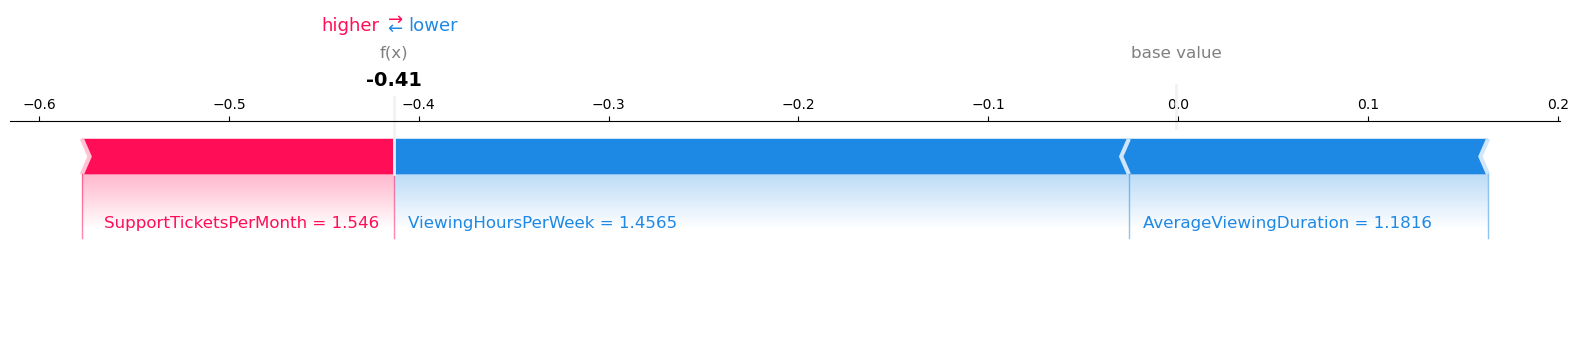

Generating SHAP force plot for index 250


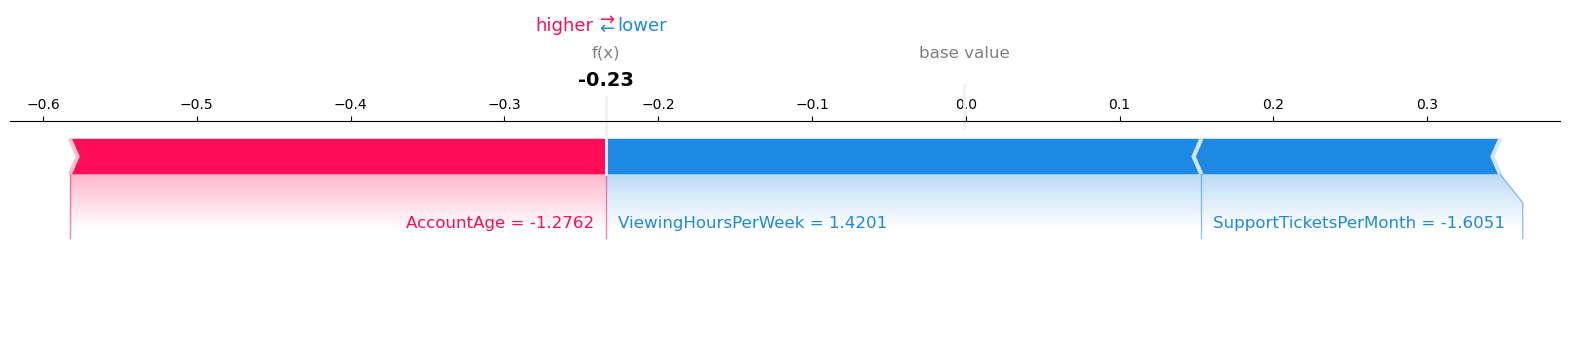

Generating SHAP force plot for index 500


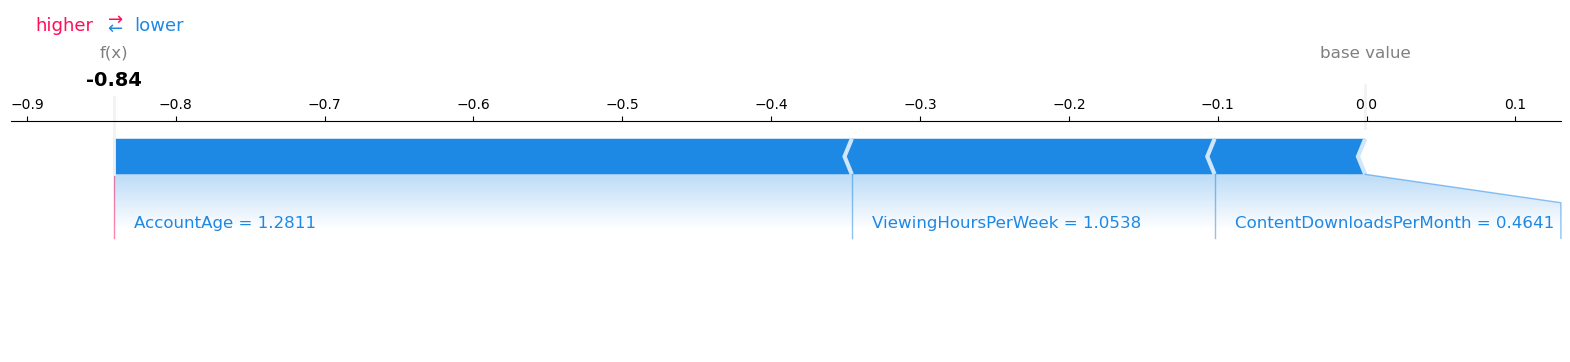

In [ ]:
def generate_force_plot(shap_values, feature_names, index, X_transformed):
    """
    Generate and display a SHAP force plot for a specific index with only the
    top three most important features included, and values rounded to four decimal places.

    Parameters:
        shap_values (np.ndarray): SHAP values for the dataset.
        feature_names (list): List of feature names after preprocessing.
        index (int): Index of the instance to visualize.
        X_transformed (np.ndarray): Transformed dataset.
    """
    shap_value_instance = shap_values[index]
    
    shap_vals_rounded = np.round(shap_value_instance, 4)
    features_rounded = np.round(X_transformed[index], 4)
    
    top_indices = np.argsort(np.abs(shap_vals_rounded))[-3:]
    
    top_shap_vals = shap_vals_rounded[top_indices]
    top_features = features_rounded[top_indices]
    top_feature_names = [feature_names[i] for i in top_indices]
    
    shap.force_plot(
        base_value=explainer.expected_value,
        shap_values=top_shap_vals,
        features=top_features,
        feature_names=top_feature_names,
        matplotlib=True
    )

indices_to_plot = [150, 250, 500]  # Indices to visualize

for index in indices_to_plot:
    print(f"Generating SHAP force plot for index {index}")
    generate_force_plot(shap_values, feature_names, index, X_test_dense)



### Github Results

In [50]:
import os
import pickle

os.makedirs('results', exist_ok=True)
os.makedirs('figures', exist_ok=True)
os.makedirs('report', exist_ok=True)
os.makedirs('src', exist_ok=True)
# Save the model
model = best_model_pipelines['xgboost'] 
with open('results/grid.save', 'wb') as file:
    pickle.dump((model, X_test, y_test), file)
print("Model saved successfully!")

# Load the model later
with open('results/grid.save', 'rb') as file:
    model, X_test, y_test = pickle.load(file)
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 

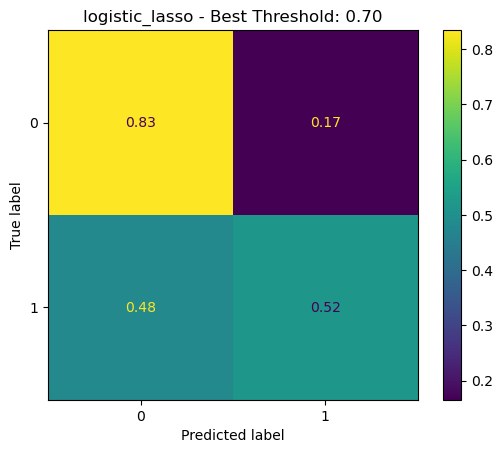

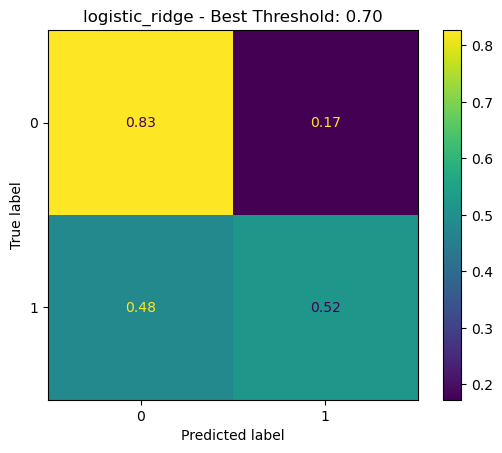

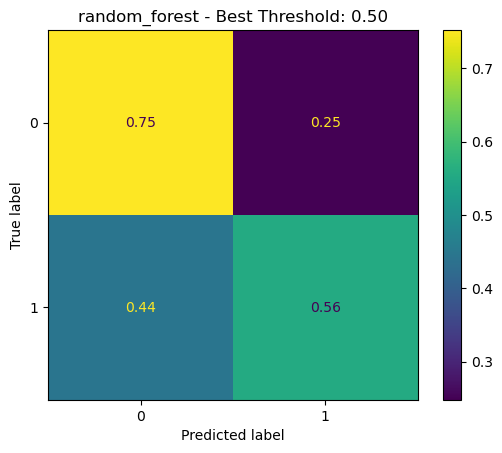

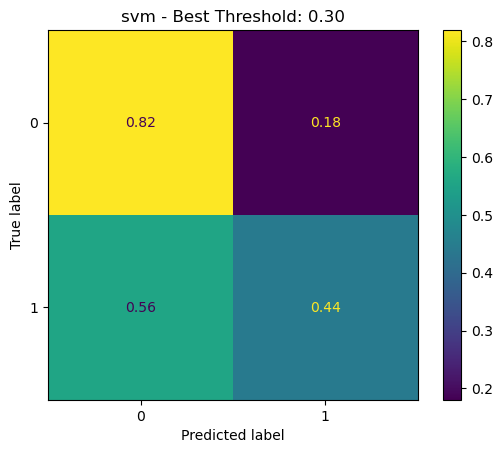

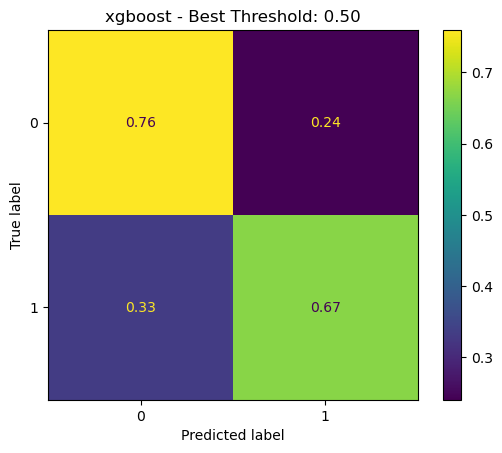

Model loaded successfully!


In [ ]:

results_df, best_model_pipelines, model_thresholds = evaluate_classification_models_with_split(
    X=X,
    y=y,
    preprocessor=preprocessor,
    models=models,
    param_grids=param_grids,
    test_size=0.2,
    scoring='f1',
    n_splits=5,
    n_random_states=5
)

# Save one of the trained models
import pickle
model = best_model_pipelines['xgboost']
file = open('results/grid.save', 'wb')
pickle.dump((model, X_test, y_test), file)
file.close()

file = open('results/grid.save', 'rb')
model, X_test, y_test = pickle.load(file)
file.close()

print("Model loaded successfully!")
